In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Life_expectancy.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Let dependent variable is Life expectancy and independent variable is GDP 

In [83]:
X = df[['Schooling']]  #independent variaable
Y = df[['GDP']] #dependent variable
Y

,GDP
0,584.259210
1,612.696514
2,631.744976
3,669.959000
4,63.537231
...,...
2933,454.366654
2934,453.351155
2935,57.348340
2936,548.587312


Lets clean data now


In [84]:
Ndf= pd.concat([X,Y],axis=1)
Ndf.isnull().sum()

Schooling    163
GDP          448
dtype: int64

In [85]:
Ndf.dropna(inplace=True)
Ndf.isnull().sum()

Schooling    0
GDP          0
dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

Splitting training and testing data

In [87]:
x_train,x_test,y_train,y_test = train_test_split(Ndf[['Schooling']],Ndf[['GDP']],test_size=0.25,random_state=42)

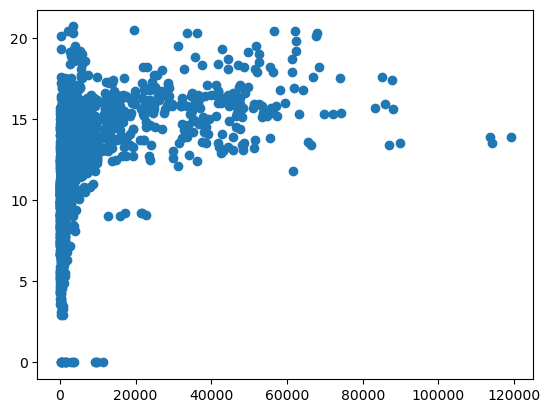

In [88]:
plt.scatter(y_train,x_train)

Now we need to standardize the values

In [89]:
from sklearn.preprocessing import StandardScaler

In [90]:
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [93]:
print(f"Coefficient is {model.coef_}")
print(f"Intercept is {model.intercept_}")

Coefficient is [[6542.42244162]]
Intercept is [7611.69329316]


ValueError: x and y must have same first dimension, but have shapes (622, 1) and (621, 1)

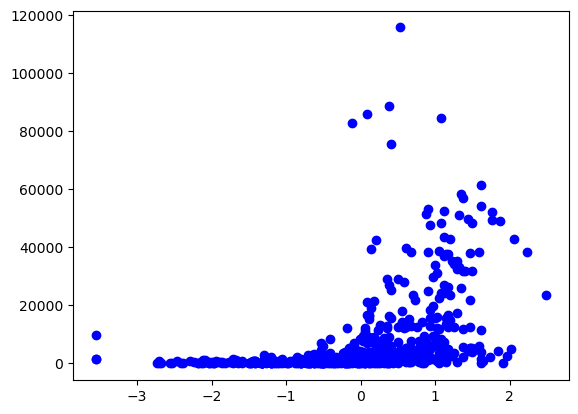

In [94]:
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.title('GDP vs Life Expectancy (Test Set)')
plt.xlabel('Standardized GDP')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()


In [95]:
y_pred = model.predict(x_test)
y_pred.shape
y_test.shape

(622, 1)

Now we need to test the Model

In [96]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

score = r2_score(y_test,y_pred)
score

0.18283202898697826